In [145]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors as mcolors

def setup_mpl():
    mpl.rc('font', size = 10)
    mpl.rcParams['legend.fontsize'] = 'small'
    mpl.rcParams['xtick.labelsize'] = 'small'
    mpl.rcParams['ytick.labelsize'] = 'small'
    #
    mpl.rcParams['font.family'] = 'Helvetica'
    mpl.rcParams['mathtext.default'] = 'regular'
    #
    mpl.rcParams['lines.linewidth'] = 1
    mpl.rcParams['lines.markersize'] = 6  
    mpl.rcParams['axes.linewidth'] = 0.75
    mpl.rcParams['axes.labelpad'] = 2
    #
    mpl.rcParams['xtick.major.pad'] = '2.3'
    mpl.rcParams['ytick.major.pad'] = '2.3'
    #
    #
    mpl.rcParams['xtick.major.width'] = 0.75  # Changed from 1
    mpl.rcParams['ytick.major.width'] = 0.75  # Changed from 1
    mpl.rcParams['xtick.minor.width'] = 0.75
    mpl.rcParams['ytick.minor.width'] = 0.75
    #
    mpl.rcParams['xtick.major.size'] = 3
    mpl.rcParams['ytick.major.size'] = 3
    #
    mpl.rcParams['xtick.minor.size'] = 1.5
    mpl.rcParams['ytick.minor.size'] = 1.5
    #
    alpha = 0.6
    to_rgba = mpl.colors.ColorConverter().to_rgba
setup_mpl()

In [146]:
import pandas as pd

In [ ]:
df = pd.read_csv("data/network/bipartite_nutriscore.csv")

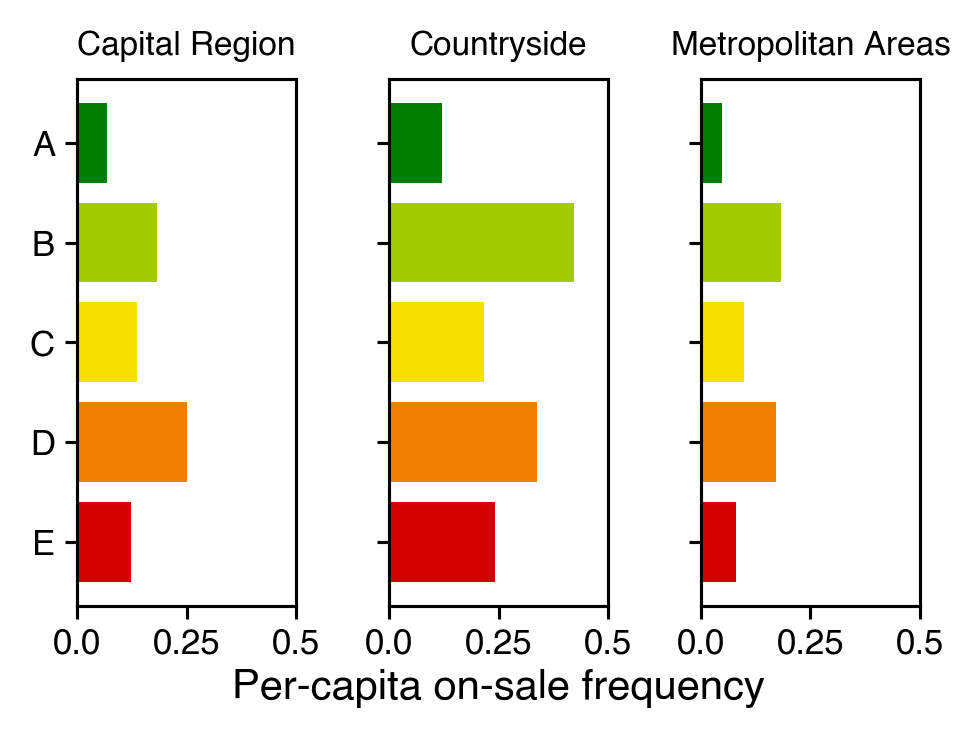

In [ ]:
colors = {
    'A': '#007f00',
    'B': '#a3cc00',
    'C': '#f5e000',
    'D': '#f07f00',
    'E': '#d60000'
}
width_cm, height_cm = 6.5+2, 4.5+2
figsize_inches = (width_cm/2.54, height_cm/2.54)
fig, axes = plt.subplots(1, 3, figsize=figsize_inches,dpi = 300, sharey=True)
communities = ['Capital Region', 'Countryside', 'Metropolitan Area']
nutriscore_categories = ['A', 'B', 'C', 'D', 'E']
nutriscore_categories = ['E', 'D',  'C', 'B', 'A']
for i, community in enumerate(communities):
    ax = axes[i]
    community_data = df[df['Community'] == community].copy()
    community_data = community_data.set_index('nutriscore').loc[nutriscore_categories].reset_index()
    bars = ax.barh(community_data['nutriscore'], 
                   community_data['pcfreq'], 
                   color=[colors[cat] for cat in community_data['nutriscore']])
    ax.set_xlim([0,0.5])
    x_ticks = [0.0, 0.25, 0.5]
    xticklabels = ["0.0","0.25","0.5"]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(xticklabels)
    if community == "Countryside":
        ax.set_xlabel("Per-capita on-sale frequency")
    if community == "Metropolitan Area":
        ax.set_title("Metropolitan Areas",fontsize=8)
    else:
        ax.set_title(community,fontsize=8)
fig.tight_layout()
fig.savefig("../figure/fig_3_nutriscore.pdf",bbox_inches = "tight",dpi = 300)

In [ ]:
df = pd.read_csv("data/network/bipartite_envscore.csv")

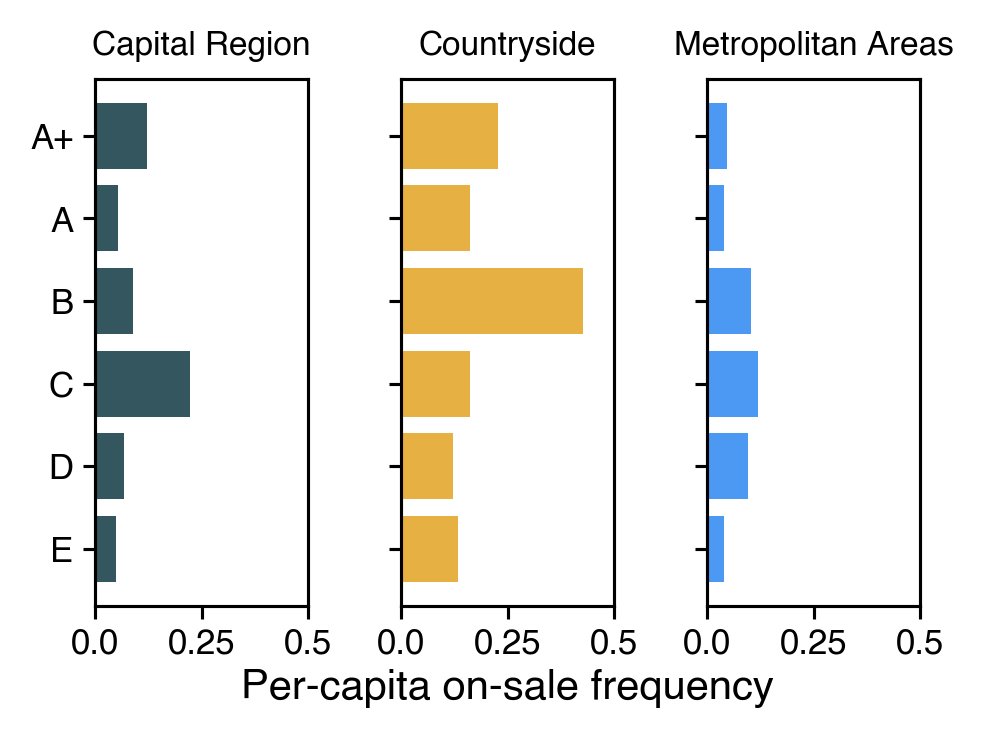

In [ ]:
colors = {
    'Capital Region': '#34565E',
    'Countryside': '#E7B043',
    'Metropolitan Area': '#4C99F4',
}
width_cm, height_cm = 6.5+2, 4.5+2
figsize_inches = (width_cm/2.54, height_cm/2.54)
fig, axes = plt.subplots(1, 3, figsize=figsize_inches,dpi = 300, sharey=True)
communities = ['Capital Region', 'Countryside', 'Metropolitan Area']
nutriscore_categories = ['E', 'D',  'C', 'B', 'A','A+']
for i, community in enumerate(communities):
    ax = axes[i]
    community_data = df[df['Community'] == community].copy()
    community_data = community_data.set_index('envscore').loc[nutriscore_categories].reset_index()
    bars = ax.barh(community_data['envscore'], 
                   community_data['pcfreq'], 
                   color=colors[community])
    ax.set_xlim([0,0.5])
    x_ticks = [0.0, 0.25, 0.5]
    xticklabels = ["0.0","0.25","0.5"]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(xticklabels)
    if community == "Countryside":
        ax.set_xlabel("Per-capita on-sale frequency")
    if community == "Metropolitan Area":
        ax.set_title("Metropolitan Areas",fontsize=8)
    else:
        ax.set_title(community,fontsize=8)

fig.tight_layout()
fig.savefig("../figure/fig_3_envscore.pdf",bbox_inches = "tight",dpi = 300)